# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [82]:
# stundent details example: John S. 9812

# student details 1: lidor E. 2612 
# student details 2: Amit L. 6819

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

<pre>
AI agent name: OpenAI ChatGPT
    
Goal: Understanding machine learning concepts and dataset interpretation for supervised learning assignment
    
Prompt1:
    I'm working with a diabetes dataset that has features like s1, s2, s3, etc. The description mentions these are blood serum measurements but I want to understand what each one represents in medical terms. Can you explain what s1 through s6 mean?
    
Prompt2:
    I found that s1 and s2 have a correlation of 0.889 in my dataset. Should I remove one of them? How do I decide which one to keep when features are highly correlated?
    
Prompt3: 
    I'm getting R² of about 0.5 on my diabetes prediction model. Is this good? What should I expect for medical data and how do I interpret this result?
    
Prompt4:
    Can you explain what max_depth and min_samples_leaf do in Random Forest? I'm trying to understand how to set up a proper grid search for hyperparameter tuning.
    
Prompt5:
    I have 353 training samples and want to use cross-validation. Should I use 5-fold or 10-fold? What are the trade-offs for small datasets like mine?
    
Prompt6: 
    I'm getting similar performance from linear regression and polynomial regression with degree=1. Why might this happen and which should I choose for my final model?
    
Prompt7:
    What's the difference between using StandardScaler and not using it when my dataset description says the features are already mean-centered and scaled?
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
<!-- * Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text: -->


<!-- #### Add information in this Markdown cell (double click to change, shift-enter to view) -->
<!-- <pre> -->
We worked with a diabetes progression dataset that includes baseline measurements for 442 patients. The inputs capture demographic information such as age and sex, body mass index and blood pressure, and six blood serum markers related to cholesterol and glucose. The goal is to predict a continuous target: the degree of disease progression one year after baseline. The dataset was already mean-centered and scaled, which simplifies preprocessing. Because the training split is modest in size (353 samples, with 89 held out for final testing), we focused on approaches that balance bias and variance and avoid unnecessary complexity. This task has clinical relevance because estimating progression can help identify higher-risk patients earlier and guide treatment decisions. Given the sample size and the fact that medical measurements often relate linearly to outcomes, we anticipated that simpler linear methods could perform well if validated carefully.
<!-- </pre> -->

## Part 2 - Data Loading and Exploratory Data Analysis
We began by importing pandas, numpy, matplotlib, seaborn, and scikit-learn for data handling, visualization, modeling, and evaluation. We loaded the training and test CSVs and verified that all 10 predictors and the target were numeric and that there were no missing values. We also reviewed the dataset description to ground the features in their medical context and confirm that the predictors were standardized at source.

We looked at dataset shapes and basic descriptive statistics to make sure everything matched expectations and to get a first sense of the scales and ranges. We then visualized distributions for each variable using histograms. This helped us check for skew, multimodality, and potential anomalies that could affect modeling. We complemented this with boxplots, which made outliers clearer. Because our dataset is relatively small, we chose to clip extreme values to the 1.5×IQR boundaries instead of removing rows. This preserved all samples while limiting the influence of extreme points on model fitting.

Next, we computed a correlation matrix and inspected it with a heatmap. This allowed us to detect multicollinearity that could destabilize certain models or inflate variance in coefficient estimates. We found a strong correlation between s1 and s2 (about 0.889), which suggested feature selection might be beneficial. We also explored feature–target relationships through pairwise plots, which showed generally linear patterns between several predictors and the outcome. From this EDA we expected linear models to be competitive, given the linear trends, the standardized features, and the small sample size that discourages high-variance, highly flexible models.

In [83]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import r2_score, mean_squared_error


sns.set_theme(style='whitegrid')
plt.rcParams['figure.dpi'] = 110

train_data = pd.read_csv('data/diabetes_train.csv')
test_data = pd.read_csv('data/diabetes_test.csv')
display(train_data.head())
print(train_data.dtypes)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,52.0,1.0,23.0,107.00,179.0,123.7,42.5,4.21,4.1589,93.0,50.0
1,22.0,1.0,18.6,97.00,114.0,57.6,46.0,2.00,3.9512,83.0,101.0
2,34.0,2.0,25.3,111.00,230.0,162.0,39.0,6.00,4.9767,90.0,181.0
3,38.0,2.0,26.8,105.00,181.0,119.2,37.0,5.00,4.8203,91.0,107.0
4,55.0,1.0,23.0,94.67,190.0,137.6,38.0,5.00,4.2767,106.0,146.0


age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [84]:
text_path = Path('data/diabetes_description.txt')
if text_path.exists():
    desc_text = text_path.read_text(encoding='utf-8')
    print(desc_text)
else:
    print(f"Description file not found at {text_path}")

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [85]:
print(f"Dataset shapes -> train: {train_data.shape} | test: {test_data.shape} | sum: {(test_data.shape[0] + train_data.shape[0], test_data.shape[1])}" )
display(train_data.describe().T)
print("Missing values (train):")
print(train_data.isna().sum())

Dataset shapes -> train: (353, 11) | test: (89, 11) | sum: (442, 11)


,count,mean,std,min,25%,50%,75%,max
age,353.0,48.433428,13.362376,19.0000,38.0000,50.0000,59.0000,79.000
sex,353.0,1.461756,0.499243,1.0000,1.0000,1.0000,2.0000,2.000
bmi,353.0,26.365439,4.517617,18.0000,23.1000,25.7000,29.2000,42.200
bp,353.0,94.599518,14.118033,62.0000,84.0000,93.0000,105.0000,133.000
s1,353.0,189.977337,34.745332,110.0000,165.0000,187.0000,213.0000,301.000
s2,353.0,115.864306,30.427219,41.6000,96.0000,113.4000,135.6000,242.400
s3,353.0,50.228045,13.185724,22.0000,40.0000,49.0000,58.0000,99.000
s4,353.0,4.052635,1.292732,2.0000,3.0000,4.0000,5.0000,9.090
s5,353.0,4.636994,0.526080,3.2581,4.2767,4.5951,4.9767,6.107
s6,353.0,91.396601,11.340604,58.0000,83.0000,91.0000,98.0000,124.000


Missing values (train):
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


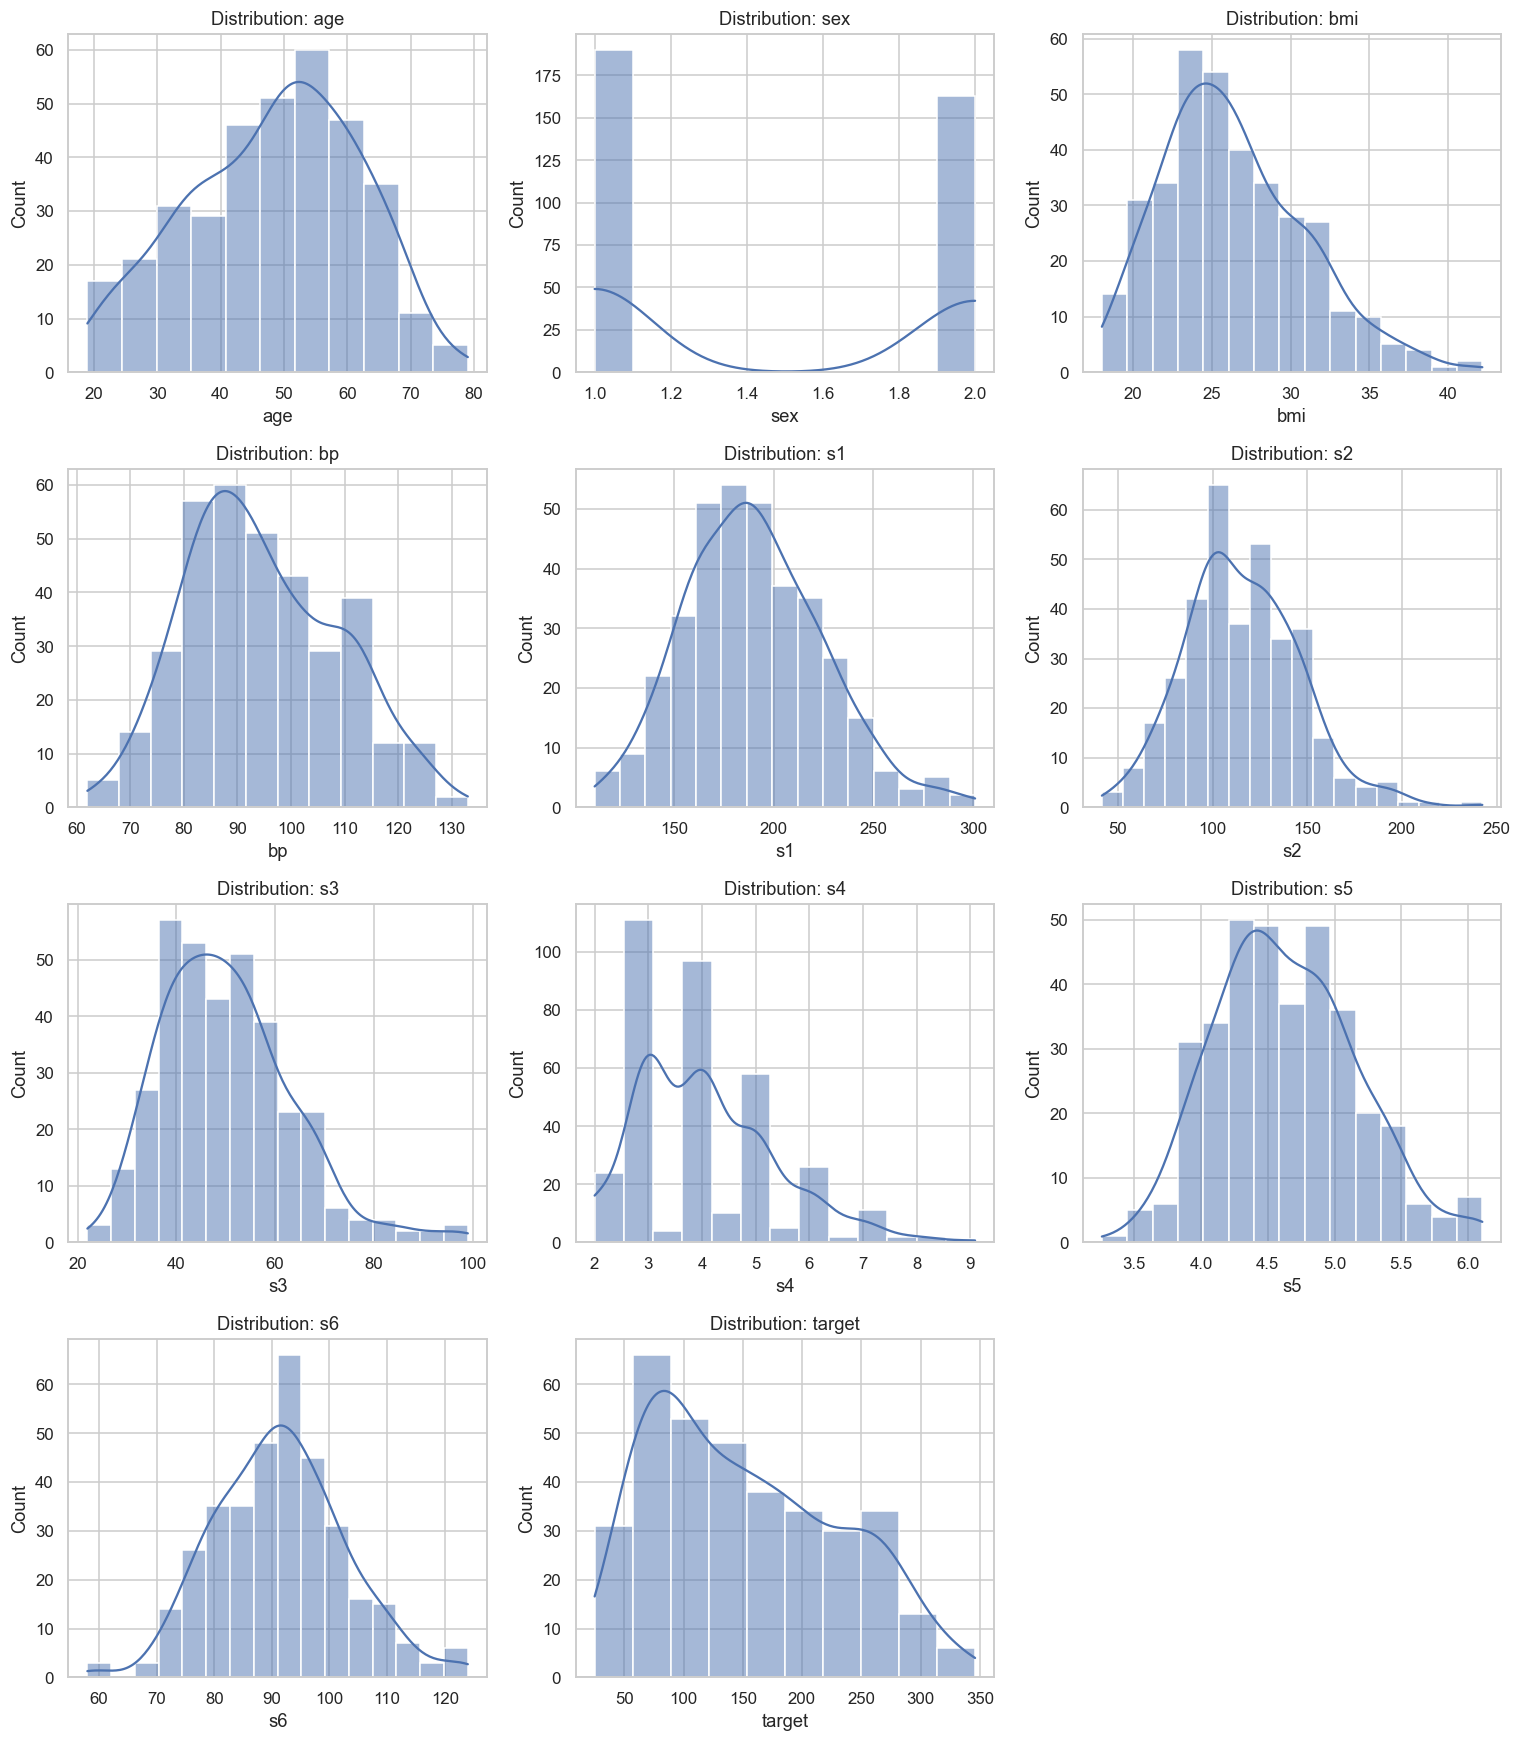

In [86]:
numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_cols)/3)), ncols=3, figsize=(14, 4*int(np.ceil(len(numeric_cols)/3))))
axes = axes.flatten()
for ax, col in zip(axes, numeric_cols):
    sns.histplot(train_data[col], kde=True, ax=ax)
    ax.set_title(f"Distribution: {col}")
for ax in axes[len(numeric_cols):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

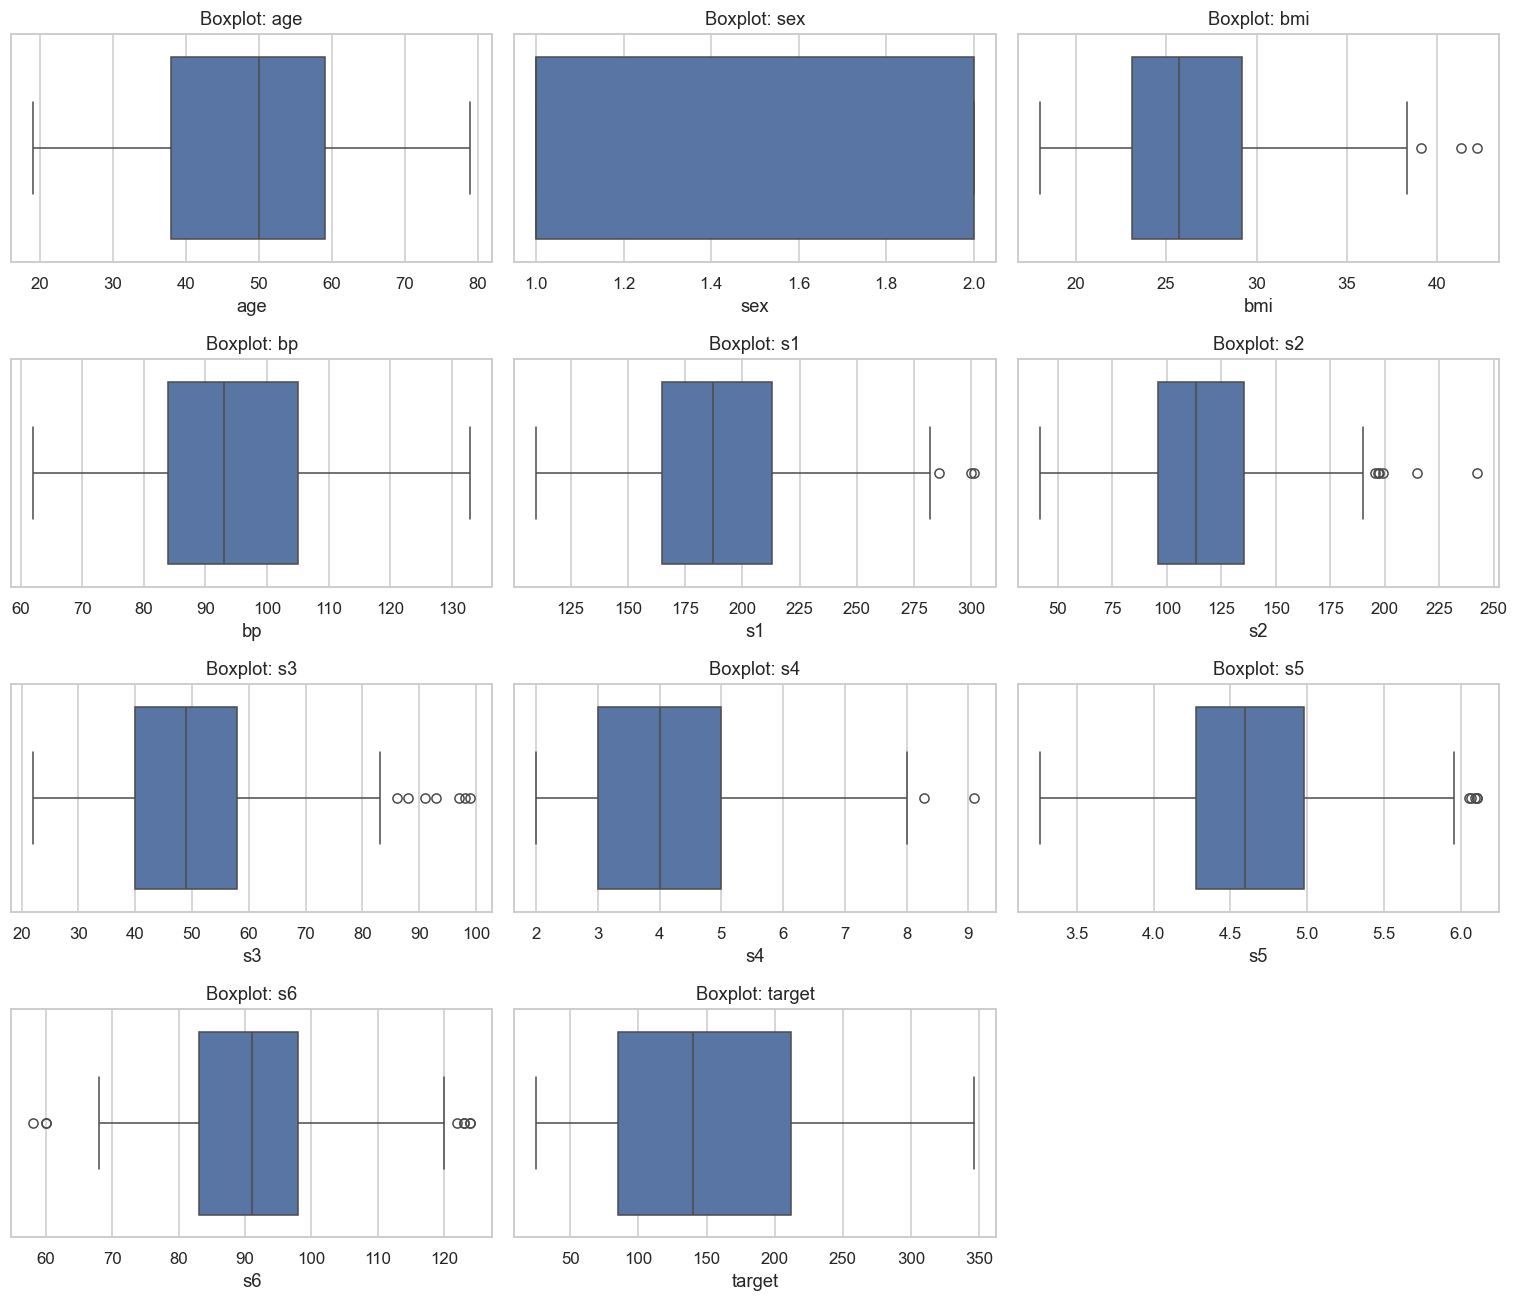

In [87]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_cols)/3)), ncols=3, figsize=(14, 3*int(np.ceil(len(numeric_cols)/3))))
axes = axes.flatten()
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=train_data[col], ax=ax)
    ax.set_title(f"Boxplot: {col}")
for ax in axes[len(numeric_cols):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

In [88]:
train_data_cleaned = train_data.copy()
for col in numeric_cols:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_data_cleaned[col] = train_data_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

print(f"Original shape: {train_data.shape}")
print(f"Cleaned shape: {train_data_cleaned.shape}")

Original shape: (353, 11)
Cleaned shape: (353, 11)


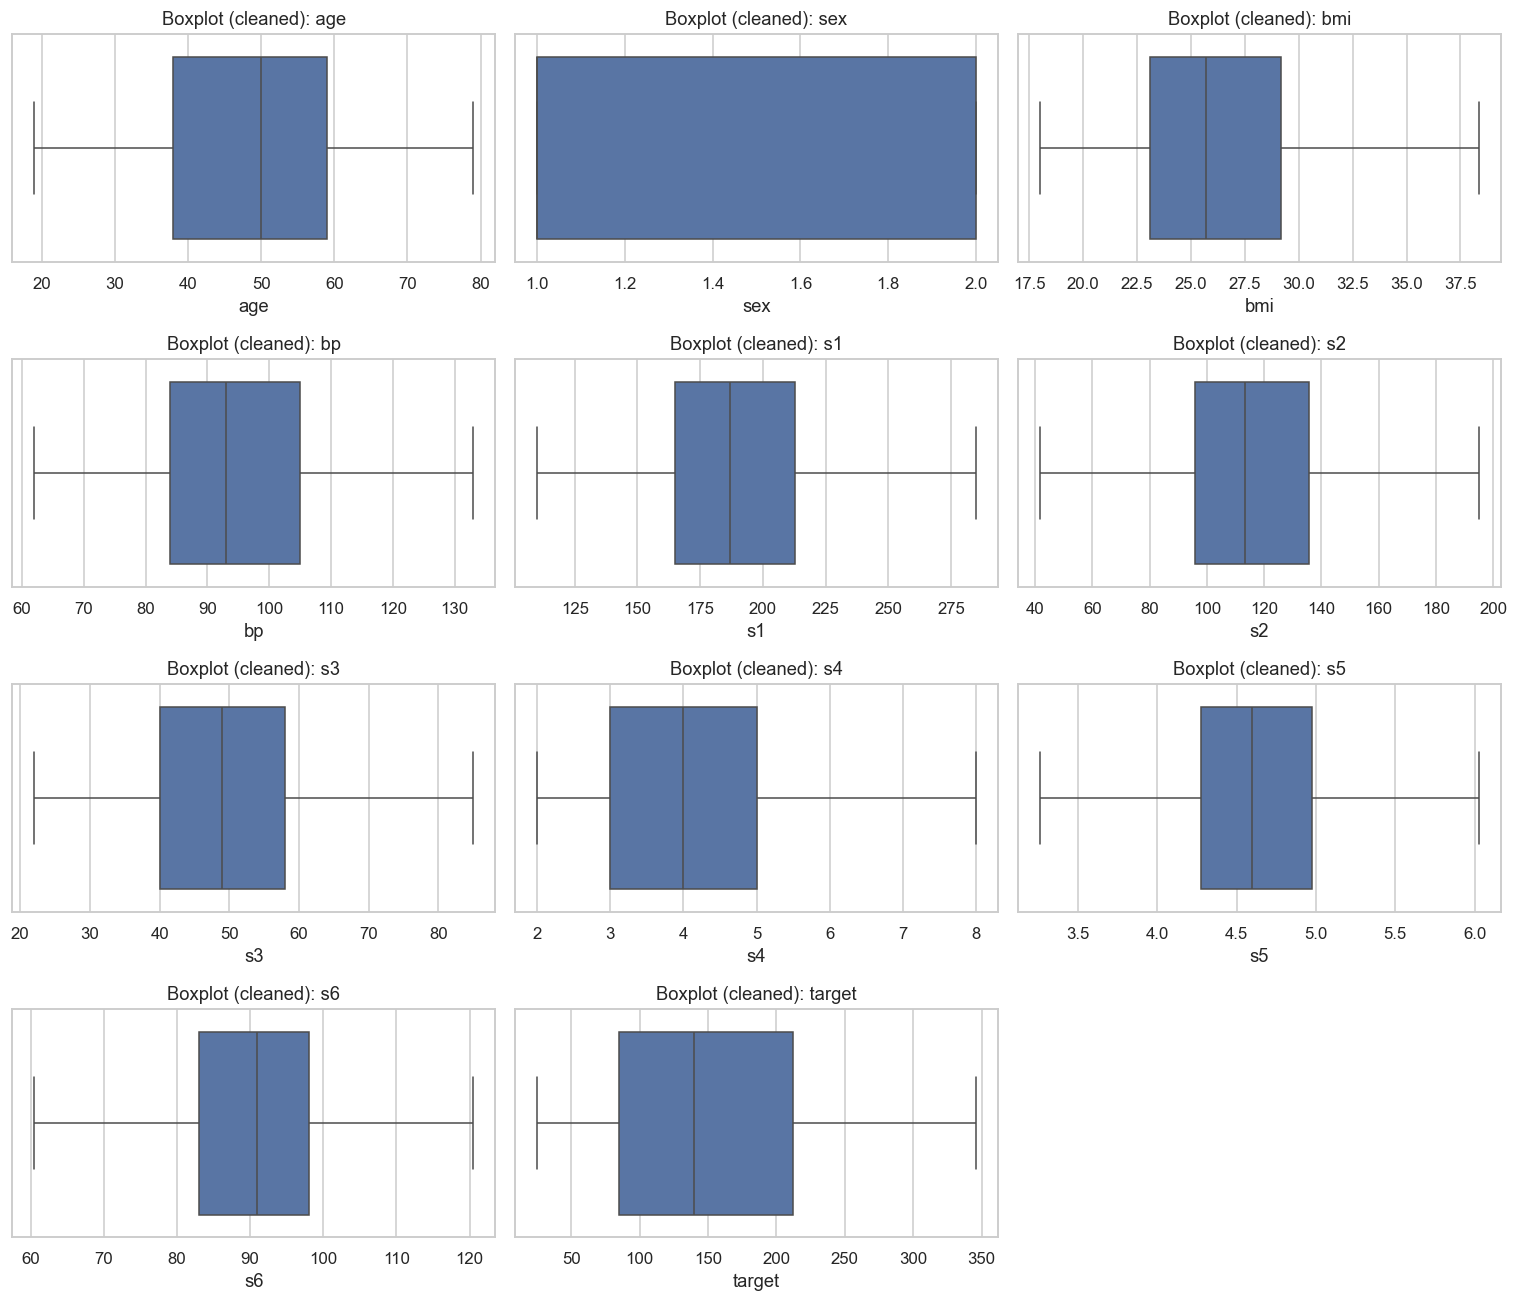

In [89]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_cols)/3)), ncols=3, figsize=(14, 3*int(np.ceil(len(numeric_cols)/3))))
axes = axes.flatten()
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=train_data_cleaned[col], ax=ax)
    ax.set_title(f"Boxplot (cleaned): {col}")
for ax in axes[len(numeric_cols):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

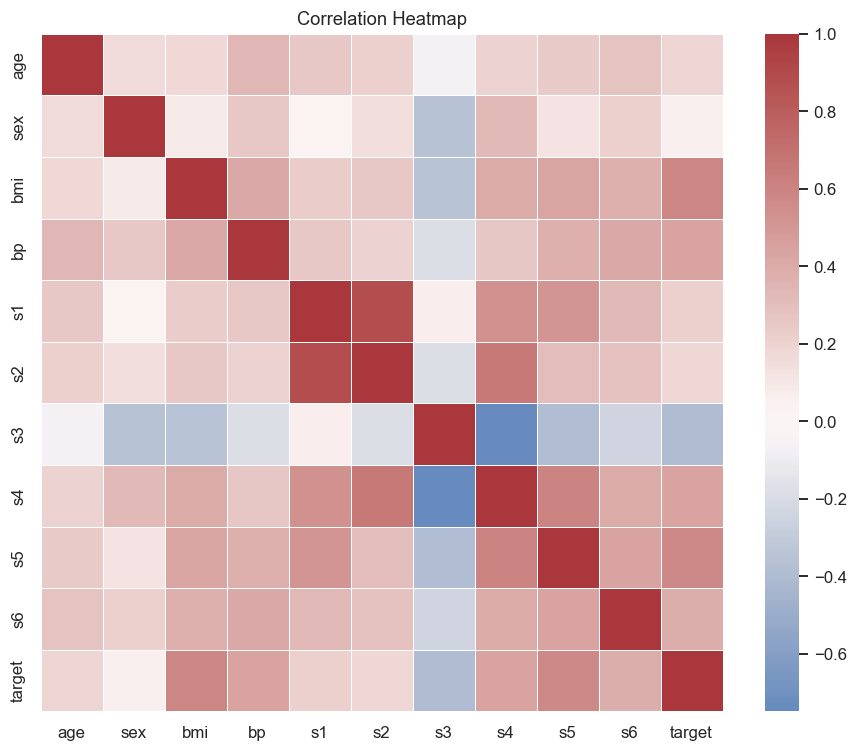

In [90]:
corr = train_data_cleaned[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="vlag", center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [91]:
feature_correlations = corr.abs()
high_corr_pairs = []
threshold = 0.8

for i in range(len(feature_correlations.columns)):
    for j in range(i+1, len(feature_correlations.columns)):
        corr_value = feature_correlations.iloc[i, j]
        if corr_value > threshold:
            high_corr_pairs.append((feature_correlations.columns[i], feature_correlations.columns[j], corr_value))

if high_corr_pairs:
    print("Highly correlated feature pairs (|correlation| > 0.8):")
    for feat1, feat2, corr_val in high_corr_pairs:
        print(f"{feat1} - {feat2}: {corr_val:.3f}")
    print("\nNote: Feature removal will be handled in Part 3 - Feature Engineering experiments")
else:
    print("No highly correlated feature pairs found (threshold: 0.8)")

Highly correlated feature pairs (|correlation| > 0.8):
s1 - s2: 0.889

Note: Feature removal will be handled in Part 3 - Feature Engineering experiments


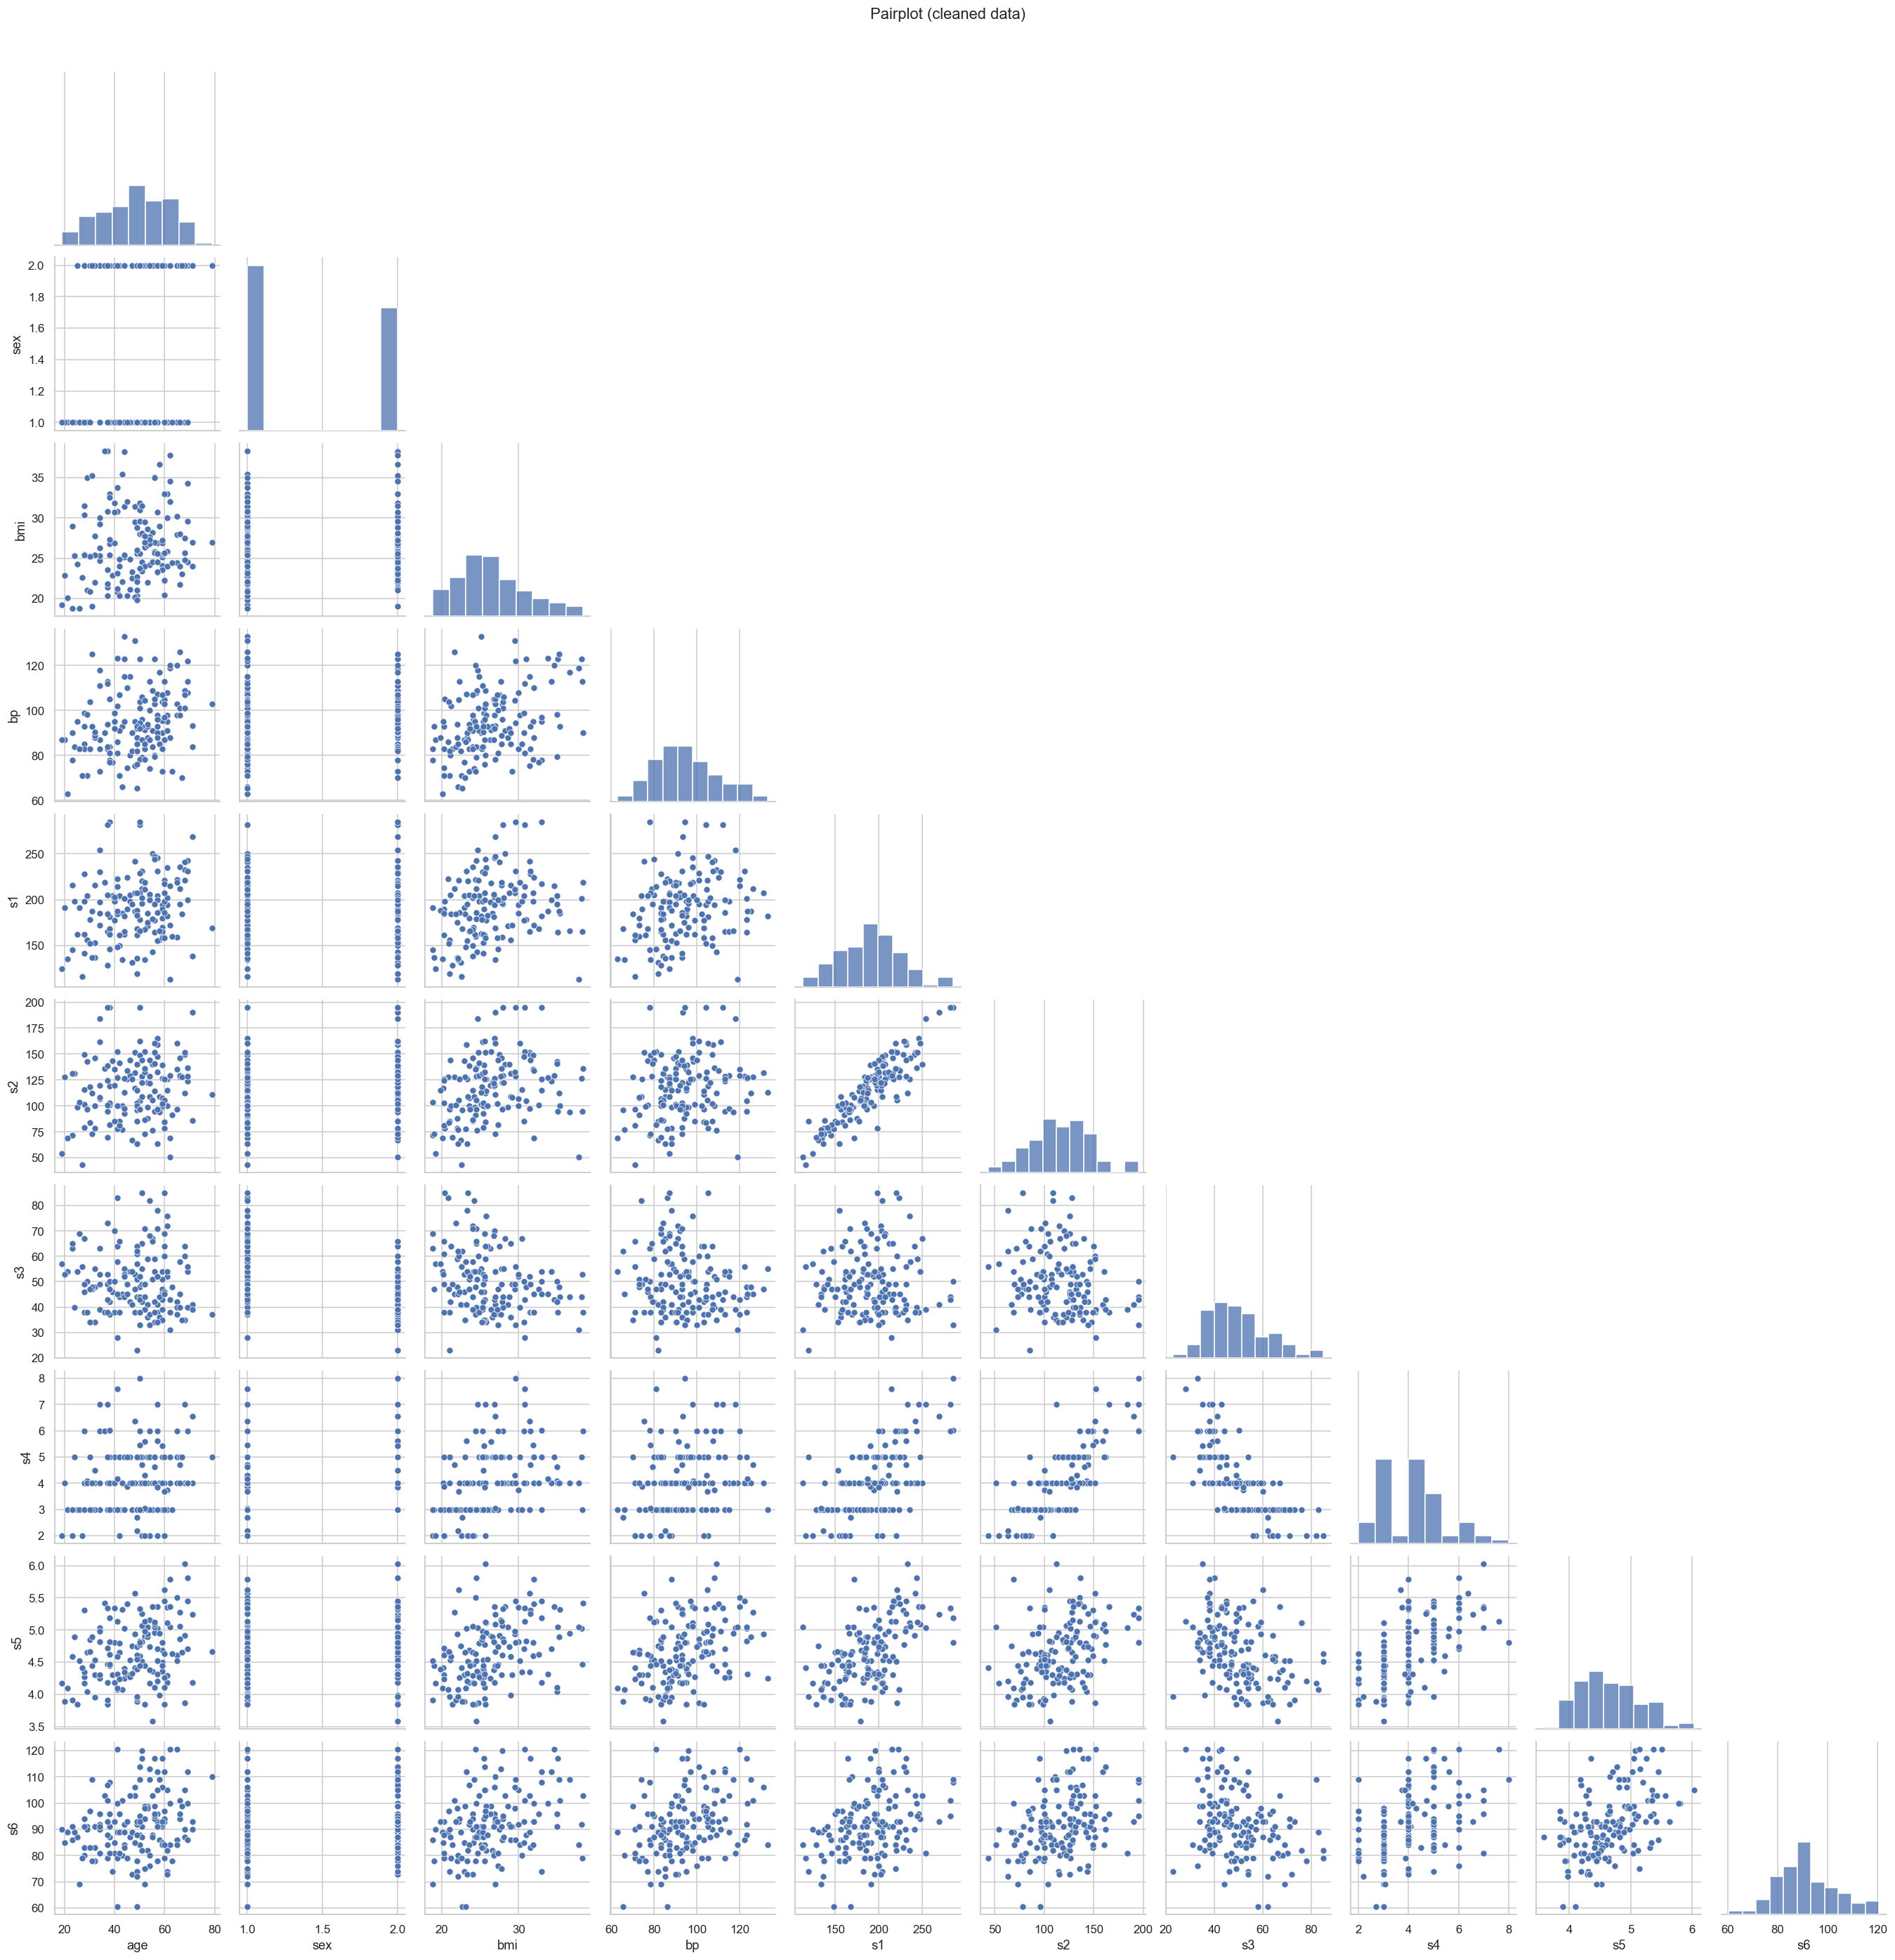

In [92]:
feature_cols = [c for c in train_data_cleaned.columns if c != 'target']
sns.pairplot(train_data_cleaned.sample(min(150, len(train_data_cleaned))),
             vars=feature_cols,
             corner=True, diag_kind='hist')
plt.suptitle("Pairplot (cleaned data)", y=1.02)
plt.show()

## Part 3 - Experiments
We designed experiments to separate the effects of preprocessing and model choice. On the preprocessing side, we compared using the data as-is versus applying a standard scaler and we compared keeping all features versus removing highly correlated ones based on a threshold, keeping the more target-informative feature when two predictors were highly correlated. This created four feature-engineering configurations.

For models, we evaluated linear regression with and without intercept fitting, K-nearest neighbors across a range of neighbor counts and weighting schemes, polynomial regression through a pipeline to test mild nonlinearity, and a random forest with a small grid over depth and leaf constraints for comparison. We did not expect KNN or tree ensembles to dominate because the dataset is small and the EDA showed mostly linear relationships; moreover, KNN can be sensitive to outliers and local sample density, and trees can overfit when data is limited.

To compare configurations fairly, we used five-fold cross-validation on the training data. We chose K-fold because the dataset is small and we did not want to take away even more data for a fixed validation set. Cross-validation lets every sample contribute to training and validation across folds, giving a more reliable estimate of generalization. We reported R² as the primary metric because it quantifies the fraction of variance explained for a continuous outcome, and we also tracked MSE and SSE for completeness.

We ran all combinations of feature configurations and model settings. The best results came from plain linear regression with fit_intercept=True and no extra preprocessing beyond the dataset’s existing standardization. Cross-validated performance reached about R² ≈ 0.499 with a reasonable standard deviation across folds. Removing the highly correlated feature did not improve performance in this case, and additional scaling did not change results materially because the inputs were already standardized. This matched our EDA-driven expectation that a simple, stable linear model would generalize well on this dataset.

### 3.1 Experiments: helper functions
We defined small utilities to apply feature engineering, remove highly correlated features, and build models from config dicts.


In [93]:
def apply_feature_engineering(config, X_train, X_val, y_train):
    """
    Apply feature engineering based on configuration
    Returns processed training and validation sets
    """
    X_train_processed = X_train.copy()
    X_val_processed = X_val.copy()
    
    if config['feature_selection'] == 'remove_correlated':
        X_train_processed, removed_features = remove_highly_correlated_features(X_train_processed, y_train)
        X_val_processed = X_val_processed.drop(columns=removed_features)
    
    if config['scaling'] == 'standard':
        scaler = StandardScaler()
        X_train_processed = scaler.fit_transform(X_train_processed)
        X_val_processed = scaler.transform(X_val_processed)
    
    return X_train_processed, X_val_processed

def remove_highly_correlated_features(X, y, threshold=0.8):
    """
    Remove features with high correlation, keeping the one more correlated with target
    """
    corr_matrix = X.corr().abs()
    target_corr = X.corrwith(y).abs()
    
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if corr_value > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_value))
    
    features_to_remove = set()
    for feat1, feat2, corr in high_corr_pairs:
        if target_corr[feat1] > target_corr[feat2]:
            features_to_remove.add(feat2)
        else:
            features_to_remove.add(feat1)
    
    return X.drop(columns=list(features_to_remove)), list(features_to_remove)



### 3.2 Experiments: define feature configs
We set four simple configurations combining with/without scaling and with/without removing highly correlated features.

In [94]:
feature_configs = [
    {'scaling': 'none', 'feature_selection': 'none'},
    {'scaling': 'standard', 'feature_selection': 'none'},
    {'scaling': 'none', 'feature_selection': 'remove_correlated'},
    {'scaling': 'standard', 'feature_selection': 'remove_correlated'},
]

### 3.3 Experiments: define model configs
We created configurations for linear regression, KNN, polynomial regression, and random forest with small, clear grids.


In [95]:
knn_configs = []
for k in range(3, 16):
    for weights in ['uniform', 'distance']:
        knn_configs.append({
            'model': 'knn', 
            'n_neighbors': k, 
            'weights': weights
        })

linear_configs=[]
linear_configs = [
    {'model': 'linear_regression', 'fit_intercept': True},
    {'model': 'linear_regression', 'fit_intercept': False},
]

poly_configs = []
for degree in [1, 2, 3]:
    for fit_intercept in [True, False]:
        poly_configs.append({
            'model': 'polynomial_regression', 
            'degree': degree, 
            'fit_intercept': fit_intercept
        })
        
forest_configs = []
for n_estimators in [100, 300]:
    for max_depth in [6, 10, None]:
        for min_samples_leaf in [1, 2]:
            forest_configs.append({
                'model': 'random_forest',
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf
            })

model_configs = linear_configs + knn_configs + poly_configs+ forest_configs

def create_model(config):
    """
    Create model instance based on configuration
    """
    if config['model'] == 'linear_regression':
        return LinearRegression(fit_intercept=config['fit_intercept'])
    
    elif config['model'] == 'knn':
        return KNeighborsRegressor(
            n_neighbors=config['n_neighbors'],
            weights=config['weights']
        )
    
    elif config['model'] == 'polynomial_regression':
        from sklearn.preprocessing import PolynomialFeatures
        from sklearn.pipeline import Pipeline
        
        return Pipeline([
            ('poly', PolynomialFeatures(degree=config['degree'], include_bias=False)),
            ('linear', LinearRegression(fit_intercept=config['fit_intercept']))
        ])
    
    elif config['model'] == 'random_forest':
        from sklearn.ensemble import RandomForestRegressor
        
        return RandomForestRegressor(
            n_estimators=config['n_estimators'],
            max_depth=config['max_depth'],
            min_samples_leaf=config['min_samples_leaf'],
            random_state=42,
            n_jobs=-1 
        )
    
    else:
        raise ValueError(f"Unknown model type: {config['model']}")

### 3.4 Experiments: choose metric and cross-validation
We used R² as the main metric and five-fold K-fold cross-validation to get stable estimates on a small dataset.


In [96]:
def evaluate_model(model, X, y, kfold=None):
    """
    Evaluate model using R², MSE, and SSE
    If kfold provided: returns CV metrics with mean ± std
    If no kfold: returns single metric values
    """
    if kfold is not None:
        r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
        mse_scores = []
        sse_scores = []
        
        for train_idx, val_idx in kfold.split(X):
            if hasattr(X, 'iloc'):
                X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
                y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
            else:
                X_train_fold, X_val_fold = X[train_idx], X[val_idx]
                y_train_fold, y_val_fold = y[train_idx], y[val_idx]
            
            model.fit(X_train_fold, y_train_fold)
            y_pred = model.predict(X_val_fold)
            
            mse = mean_squared_error(y_val_fold, y_pred)
            sse = np.sum((y_val_fold - y_pred) ** 2)
            
            mse_scores.append(mse)
            sse_scores.append(sse)
        
        return {
            'cv_r2_mean': r2_scores.mean(),
            'cv_r2_std': r2_scores.std(),
            'cv_mse_mean': np.mean(mse_scores),
            'cv_mse_std': np.std(mse_scores),
            'cv_sse_mean': np.mean(sse_scores),
            'cv_sse_std': np.std(sse_scores)
        }
    else:
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        sse = np.sum((y - y_pred) ** 2)
        
        return {
            'r2': r2,
            'mse': mse,
            'sse': sse
        }



### 3.5 Experiments: run the full grid
We evaluated every feature–model combination and recorded mean and standard deviation across folds.


In [97]:
kfold = KFold(n_splits=5, shuffle=True, random_state=45)

X_train = train_data_cleaned.drop('target', axis=1)
y_train = train_data_cleaned['target']

print(f"Training data shape: {X_train.shape}")
print(f"Target shape: {y_train.shape}")
print(f"Features: {list(X_train.columns)}")

results = []
experiment_count = 0
total_experiments = len(feature_configs) * len(model_configs)

for feature_config in feature_configs:
    for model_config in model_configs:
        experiment_count += 1

        try:
            X_processed, _ = apply_feature_engineering(
                feature_config, X_train, X_train, y_train
            )
            
            model = create_model(model_config)
            
            cv_results = evaluate_model(model, X_processed, y_train, kfold)
            
            result = {
                'experiment_id': experiment_count,
                'feature_config': feature_config,
                'model_config': model_config,
                'cv_r2_mean': cv_results['cv_r2_mean'],
                'cv_r2_std': cv_results['cv_r2_std'],
                'cv_mse_mean': cv_results['cv_mse_mean'],
                'cv_mse_std': cv_results['cv_mse_std'],
                'cv_sse_mean': cv_results['cv_sse_mean'],
                'cv_sse_std': cv_results['cv_sse_std'],
                'feature_count': X_processed.shape[1],
            }
            results.append(result)
            
        except Exception as e:
            print(f"Error in experiment {experiment_count}: {e}")
            continue

Training data shape: (353, 10)
Target shape: (353,)
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']



### 3.6 Experiments: rank and select the best
We ordered the results by cross-validated R², displayed the top 10 configurations, and then selected the best-performing setup (linear regression with fit_intercept=True and no extra preprocessing).

In [98]:
results_df = pd.DataFrame(results)

results_df_sorted = results_df.sort_values('cv_r2_mean', ascending=False)

print("Top 10 Experiment Results:")
print("=" * 80)
for i, row in results_df_sorted.head(10).iterrows():
    print(f"Rank {results_df_sorted.index.get_loc(i)+1}:")
    print(f"  Feature Config: {row['feature_config']}")
    print(f"  Model Config: {row['model_config']}")
    print(f"  CV R²: {row['cv_r2_mean']:.4f} ± {row['cv_r2_std']:.4f}")
    print(f"  CV MSE: {row['cv_mse_mean']:.4f} ± {row['cv_mse_std']:.4f}")
    print(f"  CV SSE: {row['cv_sse_mean']:.2f} ± {row['cv_sse_std']:.2f}")
    print(f"  Features: {row['feature_count']}")
    print()


Top 10 Experiment Results:
Rank 1:
  Feature Config: {'scaling': 'none', 'feature_selection': 'none'}
  Model Config: {'model': 'linear_regression', 'fit_intercept': True}
  CV R²: 0.4990 ± 0.0879
  CV MSE: 3018.1488 ± 764.5557
  CV SSE: 213123.22 ± 54461.03
  Features: 10

Rank 2:
  Feature Config: {'scaling': 'standard', 'feature_selection': 'none'}
  Model Config: {'model': 'linear_regression', 'fit_intercept': True}
  CV R²: 0.4990 ± 0.0879
  CV MSE: 3018.1488 ± 764.5557
  CV SSE: 213123.22 ± 54461.03
  Features: 10

Rank 3:
  Feature Config: {'scaling': 'standard', 'feature_selection': 'none'}
  Model Config: {'model': 'polynomial_regression', 'degree': 1, 'fit_intercept': True}
  CV R²: 0.4990 ± 0.0879
  CV MSE: 3018.1488 ± 764.5557
  CV SSE: 213123.22 ± 54461.03
  Features: 10

Rank 4:
  Feature Config: {'scaling': 'none', 'feature_selection': 'none'}
  Model Config: {'model': 'polynomial_regression', 'degree': 1, 'fit_intercept': True}
  CV R²: 0.4990 ± 0.0879
  CV MSE: 3018.14

## Part 4 - Training 
After selecting the best configuration from cross-validation, we retrained that model on the full training set to make use of all available information. We applied the same preprocessing decision as in the winning setup and fit a linear regression model with an intercept on all 353 training samples. Training on the full dataset prepares the model for an unbiased assessment on the held-out test set and reflects how we would train the model for real-world use.

In [99]:
best_result = results_df_sorted.iloc[0]
X_train_final, _ = apply_feature_engineering(
    best_result['feature_config'], X_train, X_train, y_train
)

final_model = create_model(best_result['model_config'])
final_model.fit(X_train_final, y_train)
print(f"Best configuration:")
print(f"{best_result['feature_config']}")
print(f"{best_result['model_config']}")

Best configuration:
{'scaling': 'none', 'feature_selection': 'none'}
{'model': 'linear_regression', 'fit_intercept': True}


## Part 5 - Apply on test and show model performance estimation
We prepared the test set using the same preprocessing choice as the final training configuration to avoid any mismatch between training and inference. We then generated predictions and evaluated them. The final test R² was about 0.4646, with an MSE around 2828 and SSE around 251,700. The R² on test being close to the cross-validated R² supports that our selection process generalized and did not overfit to cross-validation splits. A scatter plot of predicted versus actual values followed a near-diagonal pattern with expected dispersion, suggesting no obvious systematic bias. In practical terms, the model explains nearly half of the variation in one-year diabetes progression using readily available baseline measurements, which is a useful level of accuracy for screening and support while remaining simple and interpretable.

### 5.1 Test: prepare inputs
We dropped the target, matched training preprocessing choices, and ensured feature order and shape matched the model input.


In [100]:
X_test = test_data.drop('target', axis=1)
y_test = test_data['target']

print(f"Test set shape: {X_test.shape}")
print(f"Test target shape: {y_test.shape}")

X_test_processed, _ = apply_feature_engineering(
    best_result['feature_config'], X_test, X_test, y_test
)

print(f"Test set processed shape: {X_test_processed.shape}")

Test set shape: (89, 10)
Test target shape: (89,)
Test set processed shape: (89, 10)


### 5.2 Test: predict and evaluate
We generated predictions on the test set and computed R², MSE, and SSE to quantify performance.


In [101]:
test_predictions = final_model.predict(X_test_processed)

print(f"\nFirst 5 Test Predictions:")
print("=" * 50)
for i in range(5):
    print(f"Sample {i+1}: Actual = {y_test.iloc[i]:.2f}, Predicted = {test_predictions[i]:.2f}")

test_results = evaluate_model(final_model, X_test_processed, y_test)

print(f"\nFINAL TEST SET PERFORMANCE:")
print(f"R²:  {test_results['r2']:.4f}")
print(f"MSE: {test_results['mse']:.4f}")
print(f"SSE: {test_results['sse']:.2f}")


First 5 Test Predictions:
Sample 1: Actual = 178.00, Predicted = 197.79
Sample 2: Actual = 129.00, Predicted = 109.56
Sample 3: Actual = 53.00, Predicted = 80.95
Sample 4: Actual = 206.00, Predicted = 167.37
Sample 5: Actual = 163.00, Predicted = 194.27

FINAL TEST SET PERFORMANCE:
R²:  0.4646
MSE: 2828.0949
SSE: 251700.45



### 5.3 Test: visualize predictions
We plotted predicted versus actual values and checked alignment with the diagonal to confirm reasonable calibration.


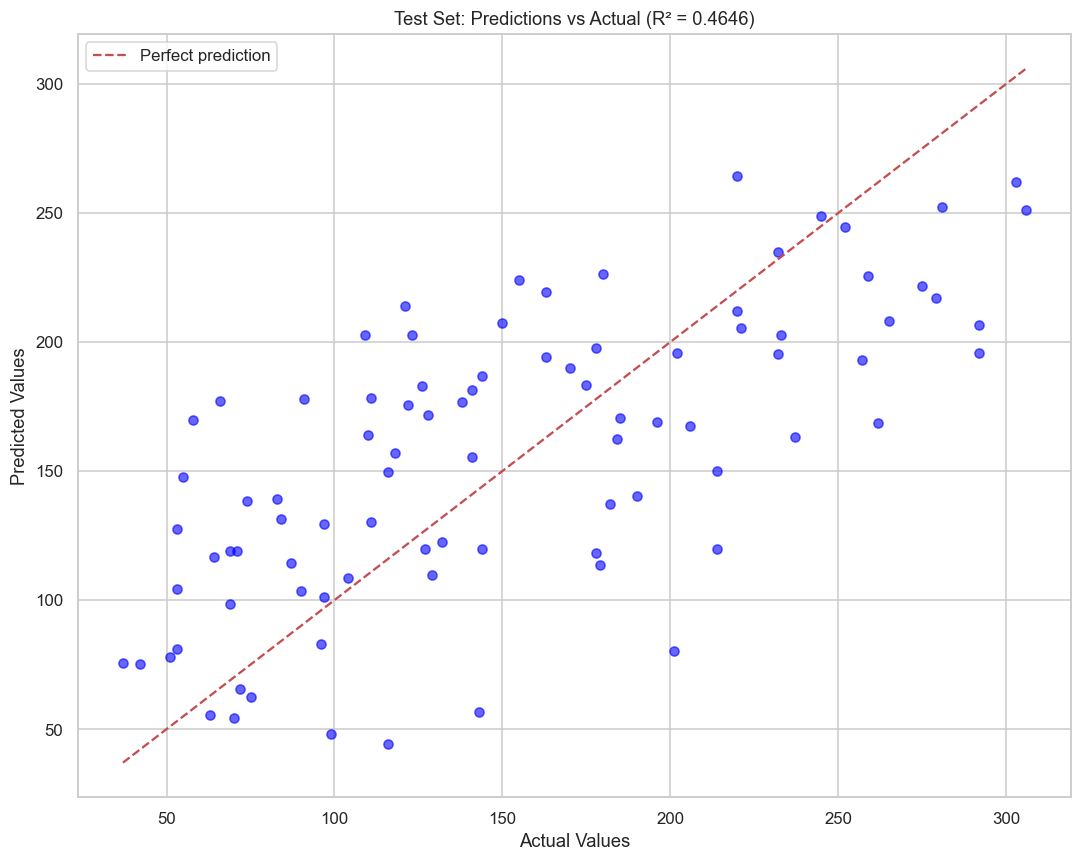

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(y_test, test_predictions, alpha=0.6, color='blue')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect prediction')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title(f'Test Set: Predictions vs Actual (R² = {test_results["r2"]:.4f})')
ax.legend()

plt.tight_layout()
plt.show()